# DATA PREPERATION I
KIT718 Tutorial 1

Data preperation involves step to tidy the data so that it can be processed. A dataset is said to be tidy if it satisfies the following conditions:
1.	observations are in rows
2.	variables are in columns
3.	contained in a single dataset.
Tidy data makes it easy to carry out data analysis.


## 1. HANDLING MISSING VALUES
First thing we will do is to deal with missing data? By missing data, we mean values that are unrecorded, 
unknown or unspecified in a dataset. How to identify them?What to do with them? remove them or replace them?

In python, missing values are represented by the symbol NaN (not available). This represents not a number.
How to find if a variable is NaN or not in your data?

#df.isnull().sum()

Let us create an example set with NaN values

In [34]:
import pandas as pd
#create data
data = {
"A": [1,None,8,None ],
"B" :[3,None ,88, 23],
"C" :[2, 45,3, 1]
}
#create panda dataframe
df = pd.DataFrame(data)


In [35]:
#print data frame
print(df)

     A     B   C
0  1.0   3.0   2
1  NaN   NaN  45
2  8.0  88.0   3
3  NaN  23.0   1


In [36]:
#Find the missing values from each column
df.isnull().sum()

A    2
B    1
C    0
dtype: int64

In some cases, the missing values in your dataframe may not be represented by NaN. For example, automobile data that you loaded in 'Python Basics' tutorial, the missing values are denoted by '?'. In that cases, to use some of the functions related to null values in Python, we need to change these values to .nan' by using following function:

 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.
For example, if df is your dataframe, 
 <pre>
import numpy as np
df.replace("?", np.nan, inplace = True)
df.head(5)
</pre>

As it is not the case in our just created data frame, we will move further.

### Ways to handle the missing values?
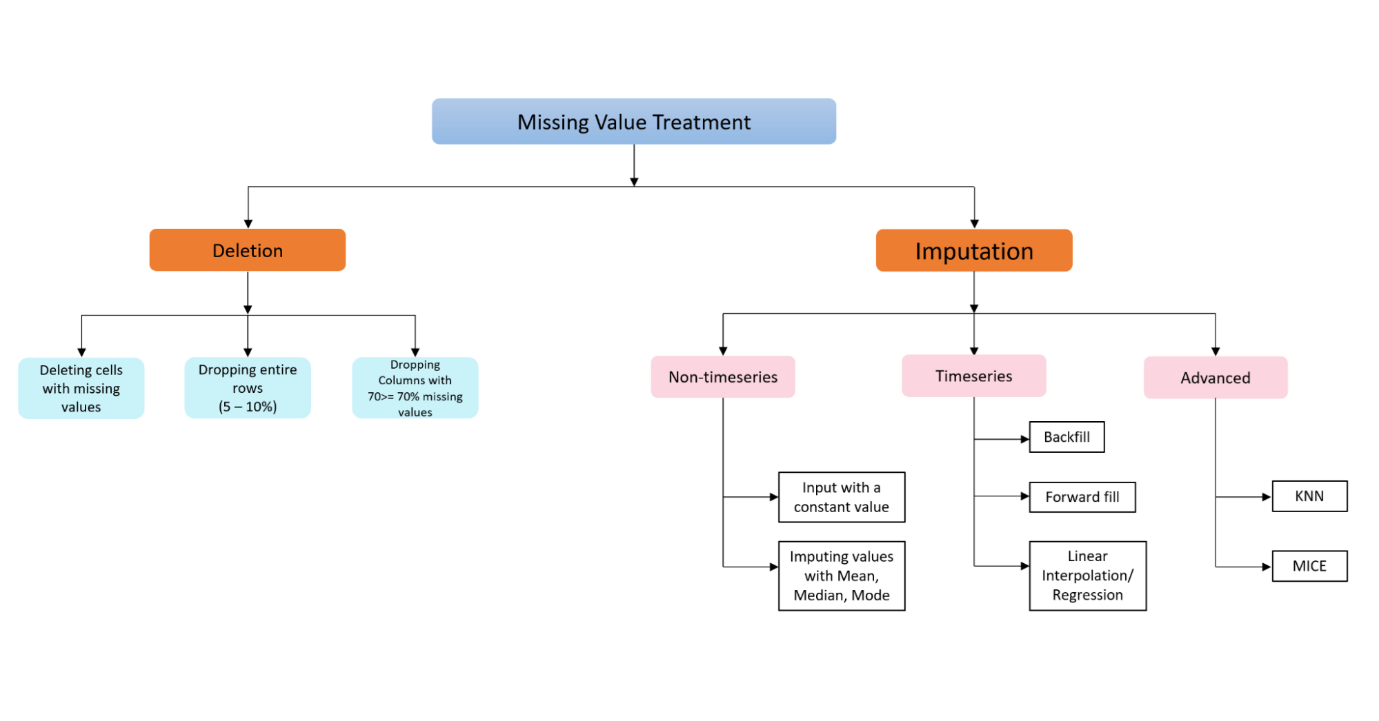
                                      source: https://www.datacamp.com/tutorial/tutorial-data-cleaning-tutorial
The method to handle missing values will depend on understanding what is the cause of it. In other words, you need to have a clear idea of your data before you would like to handle the missing values. 

<div class="alert alert-block alert-info" style="margin-top: 20px">

### 1.1 Deleting the Missing values  <br>

</div>

In [37]:
#Checking the datatypes of each column and number of not nulls in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       3 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


###### Deleting the row

In [38]:
df_row =df.dropna(axis=0)
df_row.isnull().sum()

A    0
B    0
C    0
dtype: int64

###### Deleting the column

In [39]:
#deleting the column

df_col = df.drop(['A'],axis=1)
df_col.isnull().sum()

B    1
C    0
dtype: int64

###### Deleting columns based on % of missing values

In [40]:
#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)

A    50.0
B    25.0
C     0.0
dtype: float64


In [ ]:
# let us assume we would like drop column with >30% missing values
drop_pct=30
#get indexes of columns with more than 30% missing values
drop_cols = missing_pct[missing_pct > drop_pct].index
#drop these columns with greater than 30 percent missing values
df_new = df.drop(columns = drop_cols)
df_new

<div class="alert alert-block alert-info" style="margin-top: 20px">


### 1.2 Imputing the Missing Value<br>
</div>


###### Replacing with Arbitrary Constant Value

In [42]:
#Replace the missing value with '0' using 'fiilna' method
df_arb = df.copy() #making a copy of dataframe as an example
df_arb['A']=df['A'].fillna(0)
df_arb['A'].isnull().sum()
df_arb

,A,B,C
0,1.0,3.0,2
1,0.0,NaN,45
2,8.0,88.0,3
3,0.0,23.0,1


###### Replacing with Mean

In [43]:
#Replace the missing values for numerical columns with mean
df_arb['B'] = df_arb['B'].fillna(df_arb['B'].mean())
print(df_arb)

     A     B   C
0  1.0   3.0   2
1  0.0  38.0  45
2  8.0  88.0   3
3  0.0  23.0   1


###### Replacing With Mode

In [44]:

#Mode is the most frequently occurring value. It is used in the case of categorical features.
#let us first add a new column in df dataframe
gender=['m','f',None,'m']
df=df.assign(G=gender)
print(df)
#imputing using mode
df['G'] = df['G'].fillna(df['G'].mode()[0])
print(df)

     A     B   C     G
0  1.0   3.0   2     m
1  NaN   NaN  45     f
2  8.0  88.0   3  None
3  NaN  23.0   1     m
     A     B   C  G
0  1.0   3.0   2  m
1  NaN   NaN  45  f
2  8.0  88.0   3  m
3  NaN  23.0   1  m


###### Replacing with Median

In [45]:
#Median is used for imputation in the case of outliers.
df['A']= df['A'].fillna(df['A'].median())
print(df)

     A     B   C  G
0  1.0   3.0   2  m
1  4.5   NaN  45  f
2  8.0  88.0   3  m
3  4.5  23.0   1  m


There are several other ways to fill missing values using fillna(method=‘ffill'). Please read more about it in the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html



<div class="alert alert-block alert-info" style="margin-top: 20px">

### 1.3 ADVANCED APPROACHES <br>

</div>
Upto now we consider only one column to fill the missing values without considering other columns. However, in many cases, there is some relation between other columns and the column where there are missing values. Therefore, more than one column should be considered for accurate imputation.

There are mainly two ways to do it: either using 

<li>KNN imputation(using similar neighbouring rows)</li> 
<li>Regression (aka iterative imputation)</li> 

Read about Sklearn library functions for this purpose:
<li>KNNImputer (https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) </li>  

<li> IterativeImputer methods (https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)</li> 

In [46]:
import pandas as pd
#create data
data = {
"A": [1,None,8,None ],
"B" :[3,None ,88, 23],
"C" :[2, 45,3, 1]
}
#create panda dataframe
df = pd.DataFrame(data)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       3 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes
None


###### Iterative imputer

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(df)
X1=impute_it.fit_transform(df)
df_adv=pd.DataFrame(X1)
print(df_adv)
print(df)

           0           1     2
0   1.000000    3.000000   2.0
1  57.033901  682.999997  45.0
2   8.000000   88.000000   3.0
3   2.645862   23.000000   1.0
     A     B   C
0  1.0   3.0   2
1  NaN   NaN  45
2  8.0  88.0   3
3  NaN  23.0   1


###### KNN imputation

In [48]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X2=impute_knn.fit_transform(df)
print(pd.DataFrame(X2))

     0     1     2
0  1.0   3.0   2.0
1  4.5  45.5  45.0
2  8.0  88.0   3.0
3  4.5  23.0   1.0
